# Online Food Order Prediction with MachineLearning


There has been a high demand for online food orders after the
introduction of Swiggy and Zomato in the market. Food delivery
companies use your buying habits to make the delivery process
faster. The food order prediction system is one of the useful
techniques these companies can use to make the entire delivery
process fast.

# Online Food Order Prediction: Use Case
After implementing the complete online food delivery system,
companies like Swiggy and Zomato will always try to improve
them. The main objective of these companies toward their
customers is to deliver the food at the right time. To deliver the
food faster, these companies identify areas where the demand for
online food orders is high and employ more delivery partners in
those locations. It helps deliver food faster in areas with more
orders.


These companies have so much data about their customers that
they now know the food ordering habits of all customers. With this
data, they can also predict whether or not a customer will order
again from their app. It is a good technique for identifying areas,
families and customer types with more business opportunities.


In [231]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
from pandas_profiling import ProfileReport


In [233]:
data = pd.read_csv('C:\\Users\\admin\\Desktop\\notebook1\\ml\\Online Food Order Prediction with Machine Learning\\onlinedeliverydata.csv')

In [234]:
data.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  ...  \
0              Post Graduate            4   12.9766    77.5993    560001  ...   
1                   Graduate            3   12.9770    77.5773    560009  ...   
2              Post Graduate            3   12.9551    77.6593    560017  ...   
3                   Graduate            6   12.9473    77.5616    560019  ...   
4              Post Graduate            4   12.9850    77.5533    560010  ...   

     Less Delivery time High Quality of package       Number of calls  \
0  Moderately Important    Moderately Important  Moderately Important   
1        Very Important          Very Important        Very Important   
2             Important          Very Important  Moderately Important   
3        Very Important               Important  Moderately Important   
4             Important               Important  Moderately Important   

             Politeness            Freshness            Temperature  \
0  Moderately Important  Moderately Important  Moderately Important   
1        Very Important        Very Important        Very Important   
2        Very Important        Very Important             Important   
3        Very Important        Very Important        Very Important   
4             Important             Important             Important   

            Good Taste          Good Quantity Output  \
0  Moderately Important  Moderately Important    Yes   
1        Very Important        Very Important    Yes   
2        Very Important  Moderately Important    Yes   
3        Very Important             Important    Yes   
4        Very Important        Very Important    Yes   

                                             Reviews  
0                                              Nil\n  
1                                                Nil  
2  Many a times payment gateways are an issue, so...  
3                                                nil  
4                                                NIL  

[5 rows x 55 columns]

In [235]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [236]:
%matplotlib inline

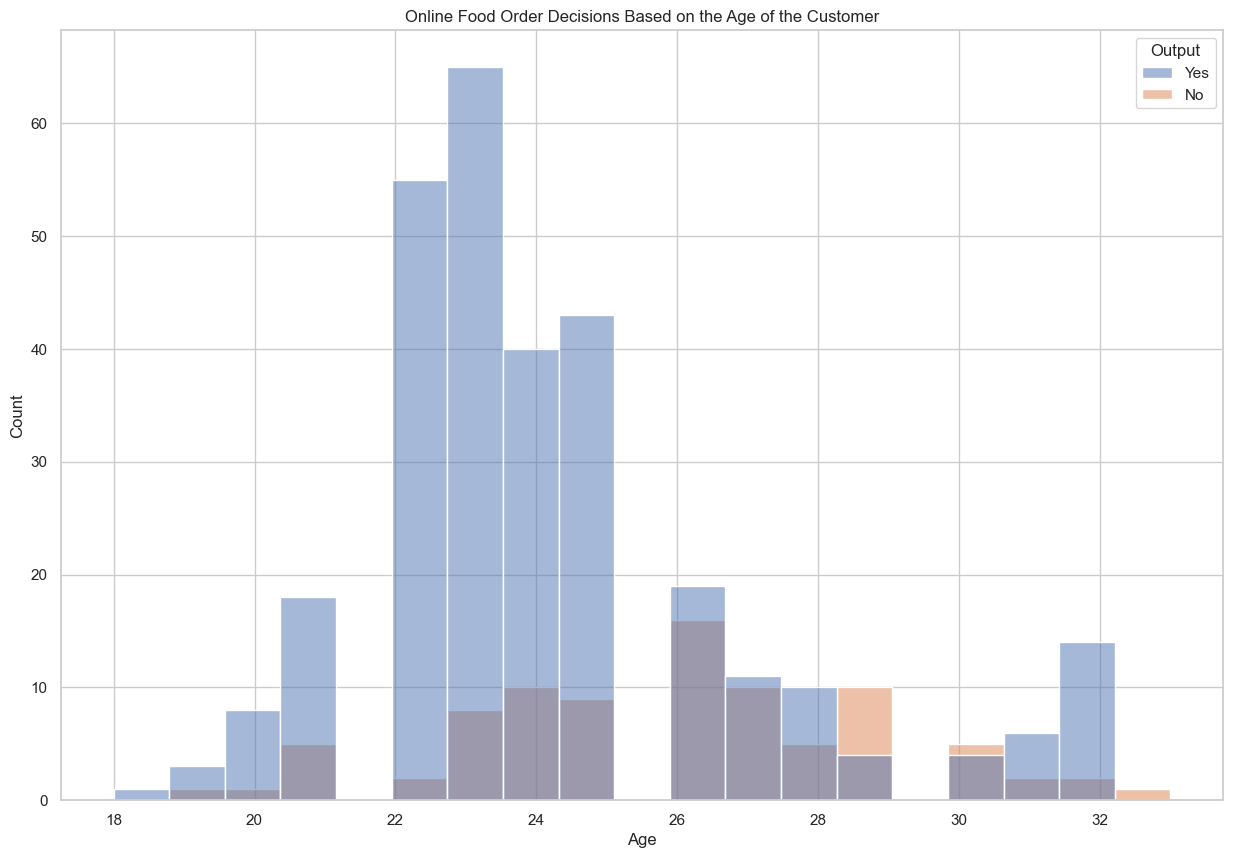

In [237]:
plt.figure(figsize=(15,10))
plt.title('Online Food Order Decisions Based on the Age of the Customer')
sns.histplot(x='Age', hue='Output',data=data)
plt.show()

We can see that the age group of 22-25 ordered the food often again. It also means this age group is the target of online food delivery companies. 

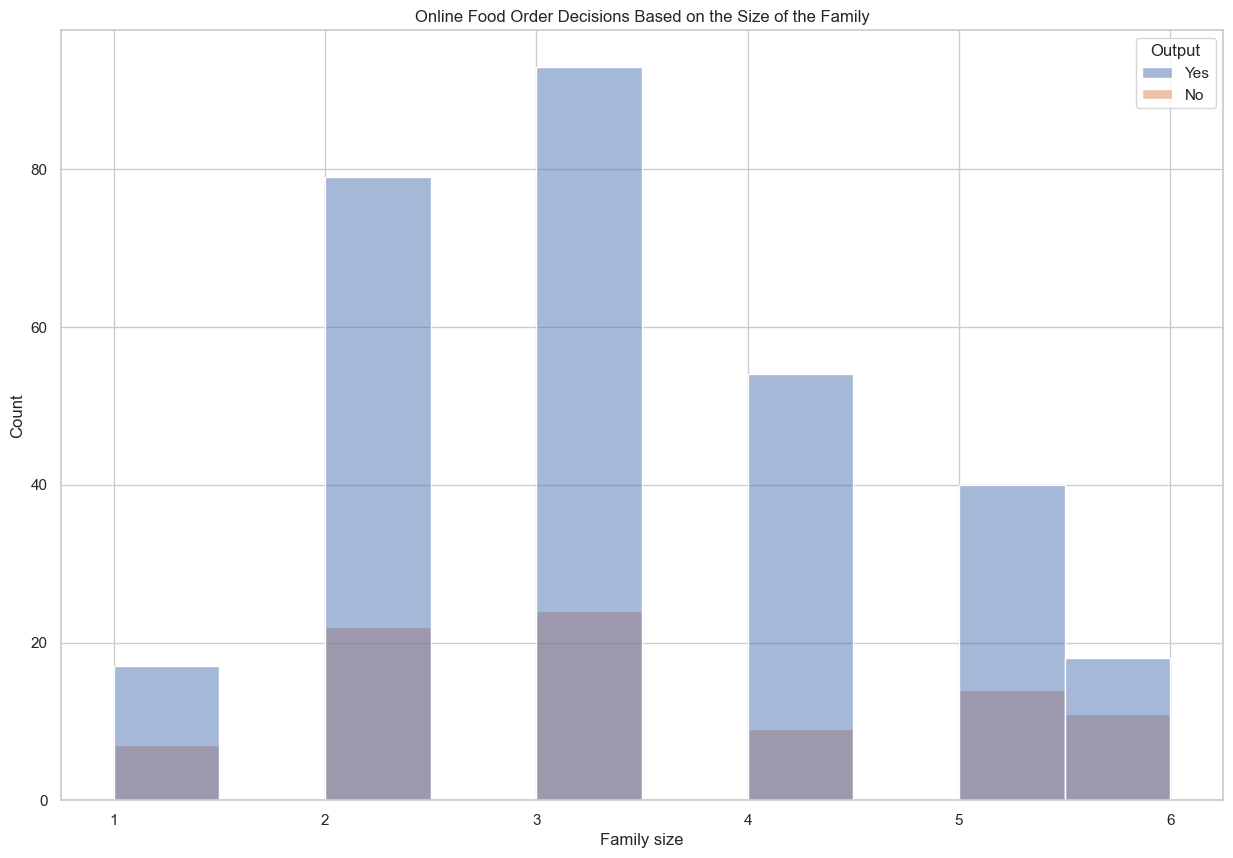

In [238]:
plt.figure(figsize=(15,10))
plt.title('Online Food Order Decisions Based on the Size of the Family')
sns.histplot(x='Family size',hue='Output',data=data)
plt.show()

Families with 2 and 3 members are ordering food often. These can be roommates, couples, or a family of three.

Let’s create a dataset of all the customers who ordered the food again:

In [239]:
df=pd.DataFrame


In [240]:
df(data.columns)

0
0                                         Age
1                                      Gender
2                              Marital Status
3                                  Occupation
4                              Monthly Income
5                  Educational Qualifications
6                                 Family size
7                                    latitude
8                                   longitude
9                                    Pin code
10                                Medium (P1)
11                                Medium (P2)
12                                   Meal(P1)
13                                   Meal(P2)
14                             Perference(P1)
15                             Perference(P2)
16                        Ease and convenient
17                                Time saving
18                    More restaurant choices
19                        Easy Payment option
20                   More Offers and Discount
21                          Good Food quality
22                       Good Tracking system
23                               Self Cooking
24                             Health Concern
25                              Late Delivery
26                               Poor Hygiene
27                        Bad past experience
28                             Unavailability
29                               Unaffordable
30                         Long delivery time
31  Delay of delivery person getting assigned
32   Delay of delivery person picking up food
33                      Wrong order delivered
34                               Missing item
35                    Order placed by mistake
36                          Influence of time
37                                 Order Time
38                          Maximum wait time
39                 Residence in busy location
40                       Google Maps Accuracy
41                        Good Road Condition
42                      Low quantity low time
43                    Delivery person ability
44                        Influence of rating
45                         Less Delivery time
46                    High Quality of package
47                            Number of calls
48                                 Politeness
49                                 Freshness 
50                                Temperature
51                                Good Taste 
52                              Good Quantity
53                                     Output
54                                    Reviews

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [242]:
data=data[['Age','Gender','Marital Status','Occupation','Monthly Income','Educational Qualifications','Family size','latitude','longitude','Pin code','Output','Reviews']]

Let’s create a dataset of all the customers who ordered the food again:

In [243]:
buying_again_data = data.query("Output == 'Yes'")
buying_again_data.head()

Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output                                            Reviews  
0    Yes                                              Nil\n  
1    Yes                                                Nil  
2    Yes  Many a times payment gateways are an issue, so...  
3    Yes                                                nil  
4    Yes                                                NIL

Now let’s have a look at the gender column. Let’s find who orders food more online:

In [244]:
gender=buying_again_data['Gender'].value_counts()
gender

Male      175
Female    126
Name: Gender, dtype: int64

In [245]:
label=gender.index
counts= gender.values
colors=['gold','lightgreen']

In [247]:
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()


According to the dataset, male customers are ordering more compared the females. 


Now let’s have a look at the marital status of the customers who ordered again:

In [248]:
marital = buying_again_data["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = ['gold','lightgreen']

In [252]:
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

According to the above figure, 76.1% of the frequent customers are singles. 


Now let’s have a look at what’s the income group of the customers who ordered the food again:

In [87]:
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['gold','lightgreen']

In [88]:
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

According to the above figure, 54% of the customers don’t fall under any income group. They can be housewives or students.

Now let’s prepare the data for the task of training a machine learning model. Here we will convert all the categorical features into numerical values:


In [150]:
data['Educational Qualifications'].unique()

array([2, 1, 3, 5, 4], dtype=int64)

In [184]:
data['Gender']=data['Gender'].map({'Male':1, 'Female':0})

In [185]:
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})

In [186]:
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})

In [188]:
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})

In [152]:
data["Reviews"] = data["Reviews"].map({"Positive": 1, "Negative ": 0})
data.head()

Age  Gender  Marital Status Occupation  Monthly Income  \
0   20       0               1    Student               0   
1   24       0               1    Student           10000   
2   22       1               1    Student           10000   
3   22       0               1    Student               0   
4   22       1               1    Student           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Reviews  
0    Yes      NaN  
1    Yes      NaN  
2    Yes      NaN  
3    Yes      NaN  
4    Yes      NaN

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
383   NaN
384   NaN
385   NaN
386   NaN
387   NaN
Name: Reviews, Length: 388, dtype: float64

# Online Food Order Prediction Model

Now let’s train a machine learning model to predict whether a customer will order again or not.start by splitting the data into training and test sets:

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Reviews"]])
y = np.array(data[["Output"]])

Now let’s train the machine learning model:

In [155]:
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)

In [227]:
data = pd.read_csv('C:\\Users\\admin\\Desktop\\notebook1\\ml\\Online Food Order Prediction with Machine Learning\\onlinedeliverydata.csv')

In [228]:
data=data[['Age','Gender','Marital Status','Occupation','Monthly Income','Educational Qualifications','Family size','latitude','longitude','Pin code','Output','Reviews']]

In [229]:
data.Occupation.unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [181]:
data["Occupation"] = data["Occupation"].map({"Student": 1, "Employee": 2,"Self Employeed": 3,'House wife':4})


In [204]:
data=data.drop(['Occupation'], axis=1)


In [205]:
data

Age  Gender  Marital Status  Monthly Income  Educational Qualifications  \
0     20       0               1             NaN                           2   
1     24       0               1             NaN                           1   
2     22       1               1             NaN                           2   
3     22       0               1             NaN                           1   
4     22       1               1             NaN                           2   
..   ...     ...             ...             ...                         ...   
383   23       0               1             NaN                           2   
384   23       0               1             NaN                           2   
385   22       0               1             NaN                           2   
386   23       1               1             NaN                           2   
387   23       1               1             NaN                           2   

     Family size  latitude  longitude  Pin code Output  \
0              4   12.9766    77.5993    560001    Yes   
1              3   12.9770    77.5773    560009    Yes   
2              3   12.9551    77.6593    560017    Yes   
3              6   12.9473    77.5616    560019    Yes   
4              4   12.9850    77.5533    560010    Yes   
..           ...       ...        ...       ...    ...   
383            2   12.9766    77.5993    560001    Yes   
384            4   12.9854    77.7081    560048    Yes   
385            5   12.9850    77.5533    560010    Yes   
386            2   12.9770    77.5773    560009    Yes   
387            5   12.8988    77.5764    560078    Yes   

                                               Reviews  
0                                                Nil\n  
1                                                  Nil  
2    Many a times payment gateways are an issue, so...  
3                                                  nil  
4                                                  NIL  
..                                                 ...  
383                                                Nil  
384                                                Nil  
385                                                Nil  
386  Language barrier is also one major issue. Mosl...  
387                                                Nil  

[388 rows x 11 columns]

In [206]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

ValueError: could not convert string to float: 'Student'